# 1. 将下面的八个点聚成两个类

A1 = (2,10), A2 = (2,5), A3 = (8,4), A4 = (5,8), A5 = (7,5), A6 = (6,4), A7 = (1,2), A8 = (4, 9)

第一次分类分成：

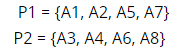

求：

P1，P2的平均值

用欧氏距离和类的均值重新划分类的归属


In [108]:
import numpy as np

A1 = [2,10]
A2 = [2,5]
A3 = [8,4]
A4 = [5,8]
A5 = [7,5]
A6 = [6,4]
A7 = [1,2]
A8 = [4,9]

P1_init = [A1,A2,A5,A7]
P2_init = [A3,A4,A6,A8]

P1_init = np.array(P1_init)
P2_init = np.array(P2_init)

P1_x_mean = np.mean(P1_init[:,0])
P1_y_mean = np.mean(P1_init[:,1])

P2_x_mean = np.mean(P2_init[:,0])
P2_y_mean = np.mean(P2_init[:,1])

P1_mean = [P1_x_mean, P1_y_mean]
P2_mean = [P2_x_mean, P2_y_mean]

print(P1_mean)
print(P2_mean)


[3.0, 5.5]
[5.75, 6.25]


In [124]:
def classifier(point,P1mean,P2mean):

    point = np.array(point)

    P1mean = np.array(P1mean)

    P2mean = np.array(P2mean)

    dist_P1 = np.linalg.norm(point-P1mean)

    print("dist p1 = "+str(dist_P1))

    dist_P2 = np.linalg.norm(point-P2mean)

    print("dist p2 = "+str(dist_P2))

    if(dist_P1>dist_P2):
        print("P2")
    else:
        print("P1")


classifier(A1,P1_mean,P2_mean)


dist p1 = 4.6097722286464435
dist p2 = 5.303300858899107
P1


# 2. 神经网络算输出

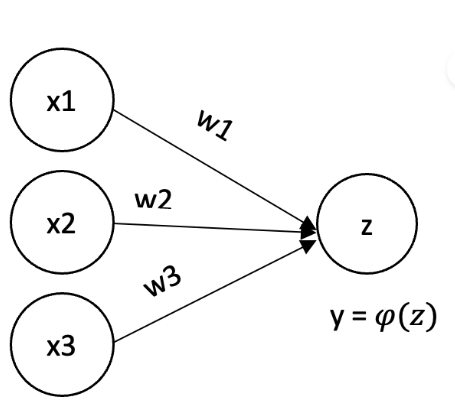

其中，三个权重值分别为：

In [91]:
w1 = 3
w2 = 7
w3 = -10

激活函数是：

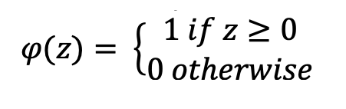

In [128]:
def output(x1,x2,x3):

    result = x1*w1+x2*w2+x3*w3

    print("result = "+str(result))

    if(result<0):
        print(0)
    else:
        print(1)

output(1,1,1)

result = 0
1


# 3. 以下三类数据

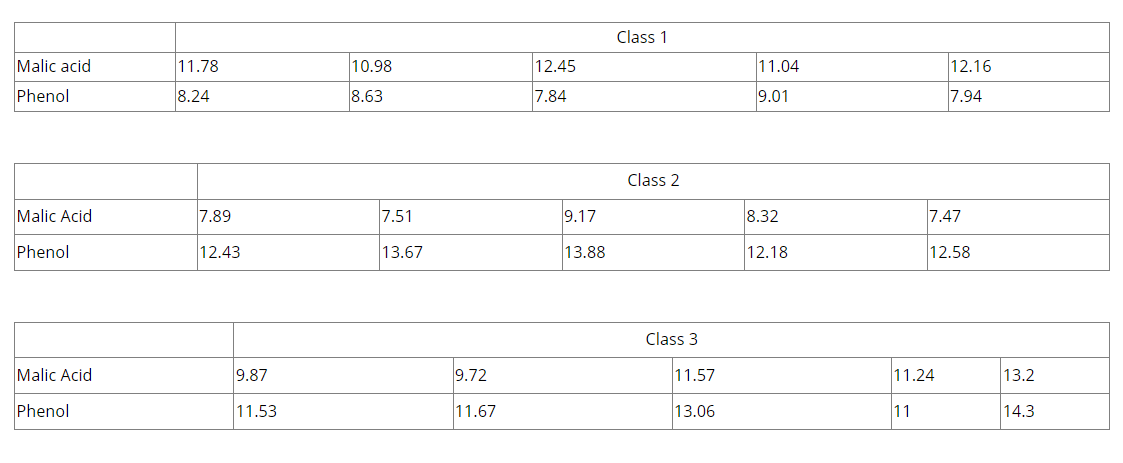

用naive bayes聚类。

先算各类的P


In [93]:
total = 15

P1 = 5/15
P2 = 5/15
P3 = 5/15

再导入那个算贝叶斯的程序

In [94]:
import math
import numpy as np

'''
description: 计算一个feature值对给定分布的隶属度的函数
return {隶属度}
'''
def normal_distribution(feature_value, mean, sd):
    return math.log(1/sd/math.sqrt(2*math.pi)*math.exp(-0.5*((feature_value-mean)/sd)**2))

# feature1:
# print("featre1:Petal Length:" + str(normal_distribution(5,1.5,0.14)))

# feature2: feature2的计算会报错，因为exp部分太小，exp函数返回了一个0.0，log(0)是非法的
#print("featre2:Petal Width:" + str(normal_distribution(2.0,0.22,0.04)))

In [134]:
# 录入三类的数据
c1_m = [11.78,10.98,12.45,11.04,12.16]
c1_p = [8.24,8.63,7.84,9.01,7.94]

c2_m = [7.89,7.51,9.17,8.32,7.47]
c2_p = [12.43,13.67,13.88,12.18,12.58]

c3_m = [9.87,9.72,11.57,11.24,13.2]
c3_p = [11.53,11.67,13.06,11,14.3]

c1_m_mean = np.mean(c1_m)
c1_m_sd = np.std(c1_m)
c1_p_mean = np.mean(c1_p)
c1_p_sd = np.std(c1_p)

c2_m_mean = np.mean(c2_m)
c2_m_sd = np.std(c2_m)
c2_p_mean = np.mean(c2_p)
c2_p_sd = np.std(c2_p)

c3_m_mean = np.mean(c3_m)
c3_m_sd = np.std(c3_m)
c3_p_mean = np.mean(c3_p)
c3_p_sd = np.std(c3_p)


x1_m = 8.11
x1_p = 12.30

L1 = math.log(P1)+normal_distribution(x1_m,c1_m_mean,c1_m_sd)+normal_distribution(x1_p,c1_p_mean,c1_p_sd)

L2 = math.log(P2)+normal_distribution(x1_m,c2_m_mean,c2_m_sd)+normal_distribution(x1_p,c2_p_mean,c2_p_sd)

L3 = math.log(P3)+normal_distribution(x1_m,c3_m_mean,c3_m_sd)+normal_distribution(x1_p,c3_p_mean,c3_p_sd)

print([L1,L2,L3])

[-61.30290345145296, -2.544752952333331, -6.1700626515606904]


# 4. 对于以下的图：
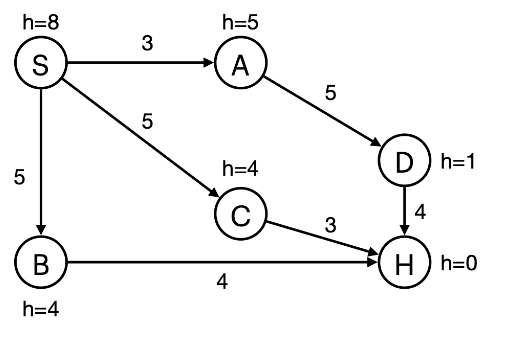


用贪心算法（仅关注启发式代价：）

找一条从S到H的路：


解：  
 扩S：SA(5) SB(4) SC(4)  
 扩B：SBH(0) SA(5) SC(4)  
 扩H：结束  

启发式代价可接受吗？连续吗？

 - 可接受：F，C不行了
 - 连续：F，C不行了

上A*


S：SA = 8, SC = 9, SB = 9

A: SAD = 9, SC = 9, SB = 9

B: SBH = 9, SC = 9, SAD = 9

C: SCH = 8, SBH = 9, SAD = 9


H: SCH WINS


# 5. 对于以下的贝叶斯网络：

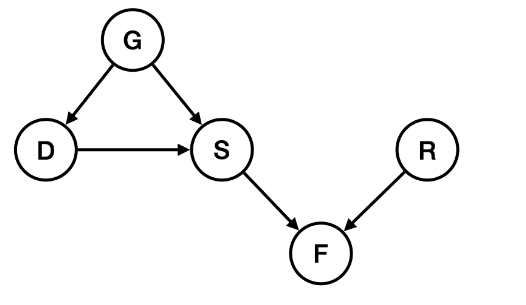

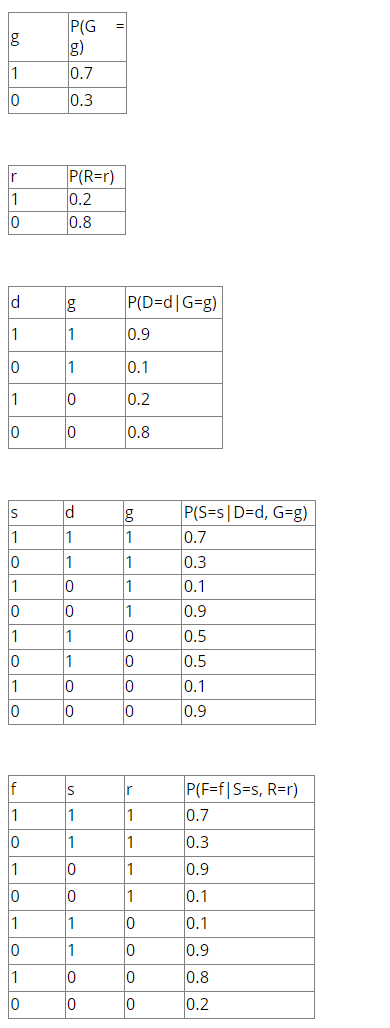

 - P(S=1)
 - P(R=1|S=1)
 - P(R=1|S=1, F=1)
 - P(F=1|S=1)
 - P(F=1|S=1, G=1)

In [137]:
#1. P(S=1):

G1 = 0.7
G0 = 0.3

D1G1 = 0.9
D0G1 = 0.1
D1G0 = 0.2
D0G0 = 0.8

S1D1G1 = 0.7
S1D0G1 = 0.1
S1D1G0 = 0.5
S1D0G0 = 0.1


S1 = S1D1G1*D1G1*G1 + S1D0G1*D0G1*G1 + S1D1G0*D1G0*G0 + S1D0G0*D0G0*G0

print(S1)

S0D1G1 = 0.3
S0D0G1 = 0.9
S0D1G0 = 0.5
S0D0G0 = 0.9

zeros = S0D1G1*D1G1*G1+S0D0G1*D0G1*G1+S0D1G0*D1G0*G0+S0D0G0*D0G0*G0
ones = S1

result = ones/(zeros+ones)
print(result)
# result==s1验证了S1是对的

0.502
0.502


In [139]:
#2. P(R=1|S=1)

# = P(R = 1,S=1) / P(S=1)
#先略过
# 我觉得是陷阱题，应该就是r1

In [140]:
#3. P(R=1|S=1, F=1)


S0 = 1-S1
R1 = 0.2
R0 = 0.8

S1F1R1 = 0.7
S1F1R0 = 0.1

fenzi = S1F1R1*S1*R1
fenmu = fenzi+S1F1R0*S1*R0

result = fenzi/fenmu

print(result)

0.6363636363636364


In [99]:
#4. P(F=1|S=1)

# = F1S1/F1S1+F1S0

F1S1 = S1F1R1*S1*R1+S1F1R0*S1*R0

# F1S0:
# = F1S0R1+F1S0R0

S0F1R1 = 0.9
S0R0F1 = 0.8

F1S0 = S0F1R1*S0*R1+S0R0F1*S0*R0

result = F1S1/(F1S1+F1S0)

print(result)


0.212875867386276


In [100]:
# 5. P(F=1|S=1,G=1):

# 我觉得是陷阱题，这题结果应该和上面一样


# 6. 对于以下的格子世界：


R如下：

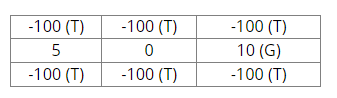

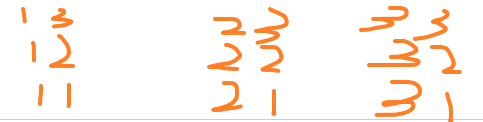

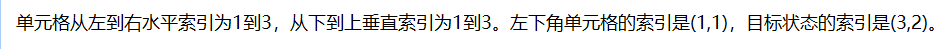

算一次迭代的结果。
 - （1，2）的动作
 - （2，2）的动作
 - （3，2）的动作
 - 第二代，政策改变（T/F）
 - 位于（1，2）的agent会在收敛后试图到达终点
 - 假设终点r为100，其他非T的格子初始U设为0，迭三代
   - （1，1）的动作
   - （1，2）的动作
   - （2，2）的动作
   - 从(1,1)出发的agent会在收敛后试图到达终点

解：
1. 算一次迭代的结果：

In [154]:
Re = 5
dis = 0.1
L = -100
R = -100
fwd = 10

result = Re+dis*(0.8*fwd+0.1*L+0.1*R)
print(result)


3.8


换了终点的reward和起点的reward之后：


In [147]:

Re = 0
dis = 0.1
L = -100
R = -100
fwd = 6

result = Re+dis*(0.8*fwd+0.1*L+0.1*R)
print(result)


-1.52


# 7. 对于以下的种群：
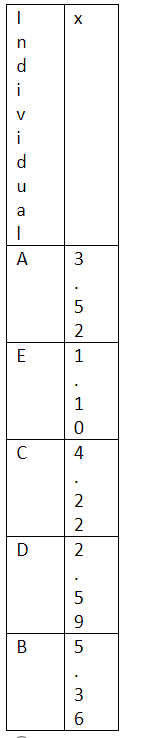

用DACBE的顺序上大转盘

0.12选了谁？

In [103]:
def fitness(num):
    return 2*num**2-num/2+5


In [152]:
A = 3.52
B = 5.36
C = 4.22
D = 2.59
E = 1.10

inds = [D,A,C,B,E]

fits = []

for _ in inds:
    fits.append(fitness(_))

fits = np.array(fits)

fits = fits/np.sum(fits)

print(fits)


[0.11391502 0.18643495 0.25620301 0.39773783 0.04570919]
